In [6]:
import numpy as np
from os.path import expanduser
Y = np.load(expanduser('MWQ_afterRS_zscore_exludeNaN_ind122.npy'))
X = np.load(expanduser('data_cross_corr_Bzdok_DMN14_preprocessed.npy'))
X = np.delete(X, 121, 0) #participant 122 doesn't have MW report

In [7]:
import readline
import rpy2.rinterface as ri
import pandas as pd
import pandas.rpy.common as com
# load the Stanford package for SCCA
com.r(
'''
library(plyr)
library(impute)
library(Rcpp)
library(PMA)
''')

df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)

rmat_X = com.convert_to_r_matrix(df_X)
rmat_Y = com.convert_to_r_matrix(df_Y)

ri.globalenv['X'] = rmat_X
ri.globalenv['Y'] = rmat_Y

#max number of components: 24
com.r(
    """
    out <- CCA(x = X, z = Y, K = %i, niter = 100, standardize = FALSE,
               penaltyx = %f, penaltyz = %f)
    """ % (13, 0.3, 0.3))

# convert the results back to dataframes and then to numpy arrays
df_u = com.convert_robj(com.r('out[1]'))['u']
df_v = com.convert_robj(com.r('out[2]'))['v']

x_loadings = df_u.as_matrix()
y_loadings = df_v.as_matrix()

C:\Users\Hao-Ting\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html


In [11]:
rest_DMN_funconn_components = np.dot(X,x_loadings)
MWQ_afterrest_components = np.dot(Y,y_loadings)

np.save('rest_DMN_funconn_components', rest_DMN_funconn_components)
np.save('MWQ_afterrest_components', MWQ_afterrest_components)

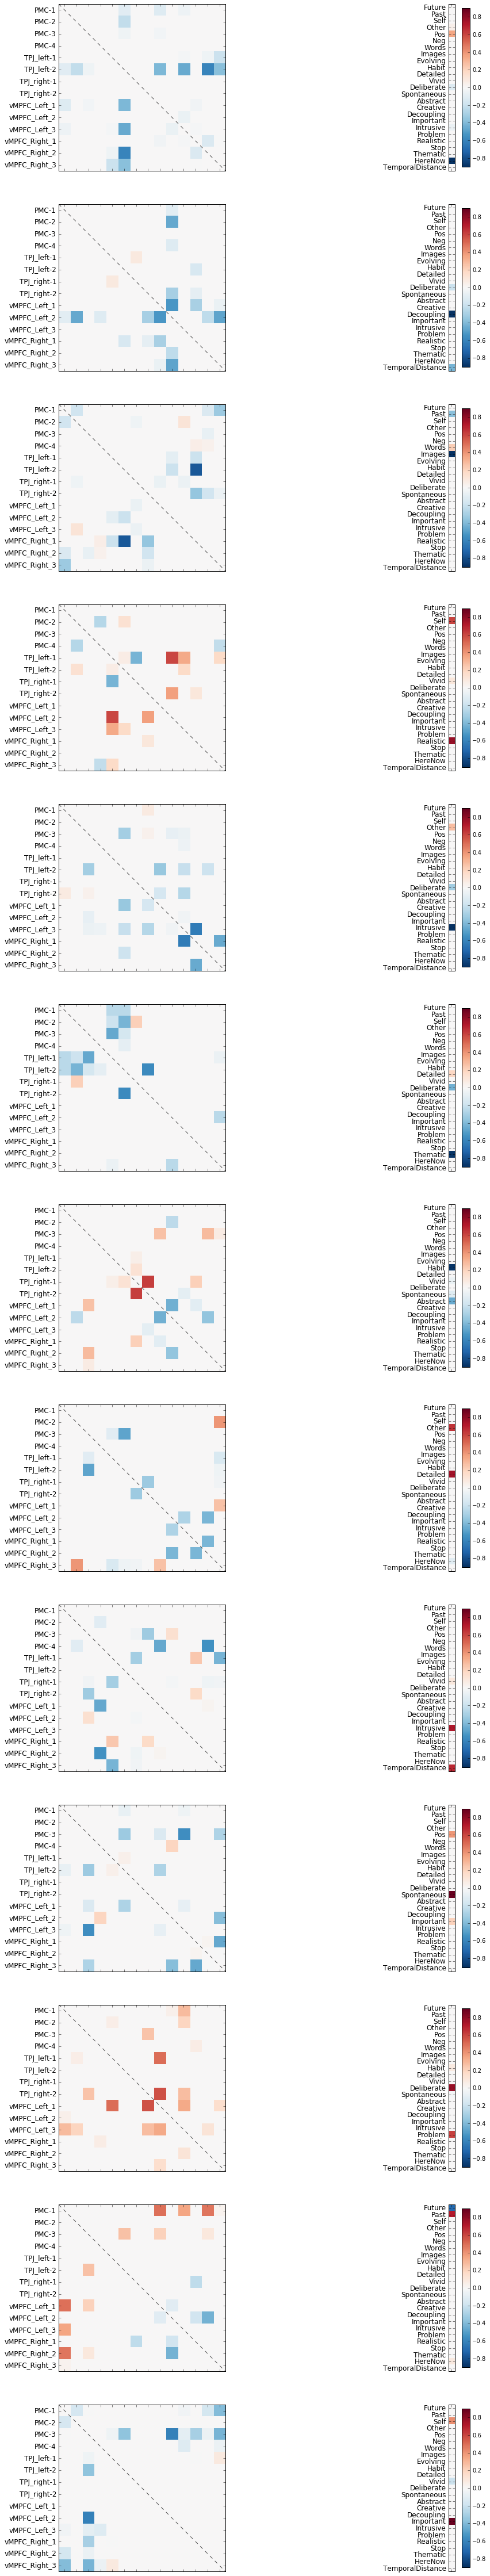

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
behavData = 'C:\\Users\\Hao-Ting\\Documents\\Work\\Project_CCA\\sourcedata\\CS_MWQafterRS.csv'
region_labels = np.load(expanduser('data_cross_corr_Bzdok_DMN14_ROIS.npy'))
beh_keys = (pd.read_csv(behavData).columns).tolist()[2:]

n_areas = 14
n_components = 13
idx = np.triu_indices(n_areas, 1)
corr_mat = np.zeros((n_areas, n_areas, n_components))
for i in range(n_components):
    this_mat = np.zeros((n_areas, n_areas))
    this_mat[idx] = x_loadings[:, i]
    corr_mat[..., i] = this_mat + this_mat.T

plt.close('all')
fig = plt.figure(figsize=(20, 80))
# fig = plt.figure()
fig.subplots_adjust(left=0.3, right=0.8, hspace = 0.2, wspace = 0.4)
for i in range(n_components):

    ax = fig.add_subplot(n_components, 2, i*2 + 1)

    brain = ax.matshow(corr_mat[..., i], vmin=-0.9, vmax=0.9, cmap=plt.cm.RdBu_r)
    ax.set_xticks(np.arange(n_areas))
    ax.set_xticklabels('', rotation=90)
    ax.set_yticks(np.arange(n_areas))
    ax.set_yticklabels(region_labels, fontsize='large')
    ax.plot([-0.5, 13.5], [-0.5, 13.5], ls='--', c='.3')
    # cb_brain = fig.colorbar(brain, fraction=0.046, pad=0.04)

    behav_ax = fig.add_subplot(n_components, 2, (i + 1)*2)
    behav_arr = np.zeros((len(beh_keys),1))
    behav_arr.flat[:y_loadings.shape[0]] = y_loadings[:, i]
    behav = behav_ax.matshow(behav_arr, vmin=-0.9, vmax=0.9, cmap=plt.cm.RdBu_r)
    behav_ax.set_yticks(np.arange(len(beh_keys)))
    behav_ax.set_yticklabels(beh_keys, fontsize='large')
    behav_ax.set_xticklabels(' ')
    cb_behave = fig.colorbar(behav, fraction=0.046, pad=0.04)
    # fig.tight_layout()

# plt.savefig(result_corr_fn)
plt.show(fig)

### List of mind wandering questions and keys
|Type	|Questions
|:- |:------------- 
|Now	|My thoughts were related to: the here and now.
|Distant	|My thoughts were related to: a more distant time
|Stop	|My thoughts were hard for me to stop
|Important	|My thoughts were on topics that I care about
|Abstract	|My thoughts were about ideas rather than events or objects
|Intrusive	|My thoughts were intrusive.
|Realistic	|I was thinking about an event that has happened or could take place
|Problem	|I was thinking about solutions to problems (or goals).
|Thematic	|My thoughts at different points in time were all on the same theme
|Decoupling	|My thoughts dragged my attention away from the external world
|Creative	|My thoughts gave me a new insight into something I have thought about before
|Future	|My thoughts involved future events.
|Past	|My thoughts involved past events.
|Self	|My thoughts involved myself.
|Other	|My thoughts involved other people.
|Positive	|The content of my thoughts was positive.
|Negative	|The content of my thoughts was negative.
|Images	|My thoughts were in the form of images.
|Words	|My thoughts were in the form of words.
|Vivid	|My thoughts were vivid as if I was there
|Vague	|My thoughts were detailed and specific.
|Habit	|This thought has recurrent themes similar to those I have had before.
|Evolving	|My thoughts tended to evolve in a series of steps
|Spontaneous	|My thoughts were spontaneous.
|Deliberate	|My thoughts were deliberate.
